<a href="https://colab.research.google.com/github/IAMLATI/Firstproj/blob/main/ptesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

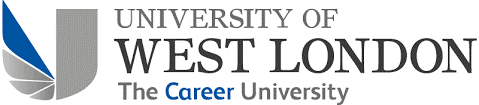

##INTRODUCTION

Pneumonia, a respiratory infection characterized by inflammation in the lungs, remains a significant global health concern. It affects individuals of all ages, causing substantial morbidity and mortality worldwide. This essay aims to provide a comprehensive analysis of pneumonia, discussing its causes, symptoms, diagnosis, treatment, and prevention strategies. Additionally, it will explore the role of classification models in pneumonia detection, emphasizing their potential in improving diagnostic accuracy and patient outcomes.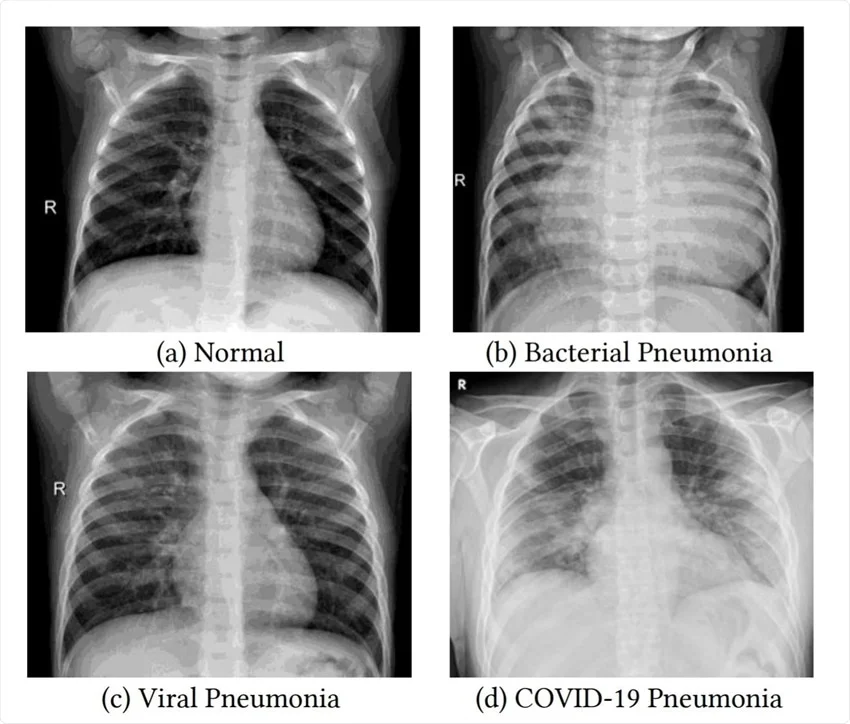

Normal Pneumonia:
Normal pneumonia, also known as community-acquired pneumonia (CAP), is a general term used to describe an infection in the lungs caused by various microorganisms. These can include bacteria, viruses, fungi, or other pathogens. It typically occurs outside of healthcare settings and affects individuals in the community. The symptoms and severity of normal pneumonia can vary depending on the causative agent, the individual's overall health, and other factors.

Viral Pneumonia:
Viral pneumonia is a type of pneumonia caused by viruses, such as influenza (flu), respiratory syncytial virus (RSV), adenovirus, or parainfluenza virus. Viral pneumonia tends to be more common in children and older adults, as well as individuals with weakened immune systems. It can present with symptoms similar to other types of pneumonia, including cough, fever, difficulty breathing, and fatigue. However, viral pneumonia may also exhibit distinct features, such as the presence of a viral prodrome (flu-like symptoms) before the respiratory symptoms become prominent.

Bacterial Pneumonia:
Bacterial pneumonia occurs when bacteria, most commonly Streptococcus pneumoniae, enter the lungs and cause infection. Other bacterial pathogens that can cause pneumonia include Haemophilus influenzae, Staphylococcus aureus, and Legionella pneumophila. Bacterial pneumonia often presents with sudden onset of symptoms, such as high fever, productive cough with yellow or green sputum, chest pain, and difficulty breathing. It can be severe, especially in older adults or individuals with underlying health conditions. Bacterial pneumonia is typically treated with antibiotics.

COVID-19 Pneumonia:
COVID-19 pneumonia is a specific type of viral pneumonia caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It is the virus responsible for the ongoing global pandemic of coronavirus disease 2019 (COVID-19). COVID-19 pneumonia exhibits some unique characteristics compared to other types of pneumonia. The symptoms can range from mild to severe and may include fever, dry cough, shortness of breath, fatigue, loss of taste or smell, muscle aches, and sore throat. In severe cases, it can lead to acute respiratory distress syndrome (ARDS) and multiorgan failure.

##Symptoms

Symptoms of pneumonia can vary depending on the age and overall health of the individual. Common signs include cough, fever, chest pain, rapid breathing, shortness of breath, fatigue, and in severe cases, cyanosis (a bluish discoloration of the lips and fingertips). Elderly individuals or those with weakened immune systems may present with atypical symptoms such as confusion or decreased alertness.

#Deep learning model development based on Chest X-Ray Images (Pneumonia) dataset

##Loading Analysis Packages

> Indented block



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transform
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dset
import utils as JonathanLoo
from torch.utils import data
from torchsummary import summary
from matplotlib import pyplot as plt
%matplotlib inline
# config device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


##Loading the dataset

In [ ]:
path='/content/drive/MyDrive/Pneunomiaedited'

In [ ]:
test="/content/drive/MyDrive/Pneunomiaedited/test"
train="/content/drive/MyDrive/Pneunomiaedited/train"
val="/content/drive/MyDrive/Pneunomiaedited/val"

In [ ]:
#hyperparameters
num_epochs=2
batch_size=750
learning_rate=0.03
hyper_param = {
    "balance":True,
    "num_epochs": 2,
    "batch_size": 750,
    "image_size": 224,
    "fc1_size": 512,
    "lr": 0.03,
    "scheduler": 'CosineAnnealingLR10'
}

In [ ]:
transform2 = transforms.Compose([
    transforms.RandomRotation(20),  # Randomly rotate the image within a range of (-20, 20) degrees
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip the image horizontally with 50% probability
    #transforms.RandomResizedCrop(size=(h["image_size"], h["image_size"]), scale=(0.8, 1.0)),  # Randomly crop the image and resize it
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Randomly change the brightness, contrast, saturation, and hue
    #transforms.RandomApply([transforms.RandomAffine(0, translate=(0.1, 0.1))], p=0.5),  # Randomly apply affine transformations with translation
    #transforms.RandomApply([transforms.RandomPerspective(distortion_scale=0.2)], p=0.5),  # Randomly apply perspective transformations
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])


transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((224, 224)),
       
     transforms.Normalize((0.5), (0.5))])
train_dataset=dset.ImageFolder(root=train, transform=transform2)

test_dataset=dset.ImageFolder(root=test, transform=transform )

val_dataset=dset.ImageFolder(root=val, transform=transform )

train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader=DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

val_loader=DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

classes=('BACTERIA','NORMAL','VIRUS')



 ## Analyse and visualise the dataset

*   List item
*   List item



In [ ]:
print(f'This dataset contains a training set of: {len(train_dataset)}, a test set of: {len(test_dataset)}, and a validation set of: {len(val_dataset)}')


This dataset contains a training set of: 5208, a test set of: 624, and a validation set of: 24


#Observation:
The dataset contains 5,856 images, splits into a training set of :5208, a test set of: 624, and a validation set of: 24
The dataset has two target/label: Normal or Pneumonia.

However, i noticed the pneumonia contains two types of Pneumonia: Bacteria and Virus.

I split the Pneumonia dataset into bacteria and virus, to partially reduce the  oversampling of the pneumonia dataset. 
we can see that our dataset set is imbalance


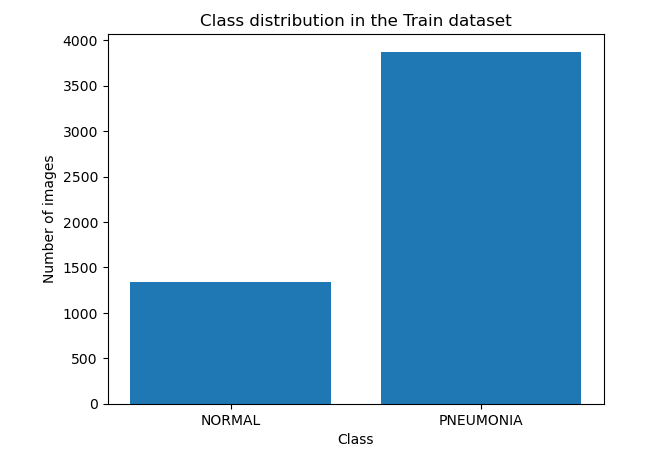


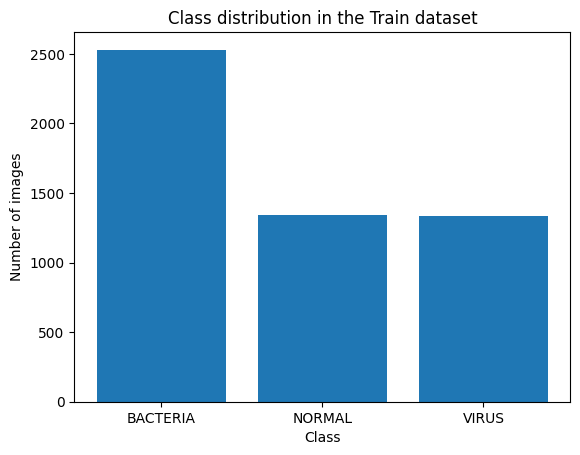

Train dataset mean: 0.0265, standard deviation: 1.0747


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


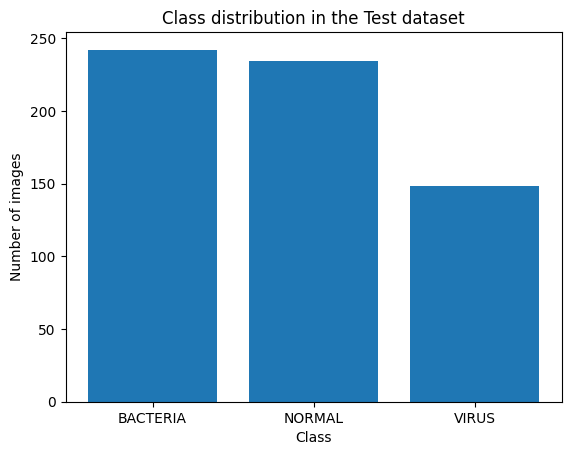

Test dataset mean: -0.0506, standard deviation: 0.4507


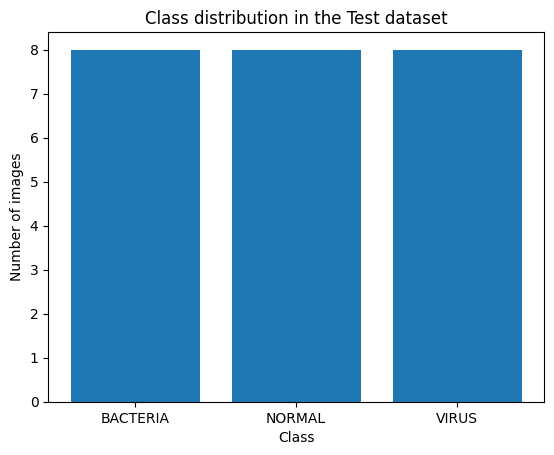

Test dataset mean: -0.0506, standard deviation: 0.4507


In [ ]:
def visualize_class_distribution(dataset, dataset_name):
    class_counts = np.zeros(len(dataset.classes))
    for _, y in dataset:
        class_counts[y] += 1

    plt.bar(dataset.classes, class_counts)
    plt.xlabel("Class")
    plt.ylabel("Number of images")
    plt.title(f"Class distribution in the {dataset_name} dataset")
    plt.show()

def calculate_dataset_stats(dataset):
    mean = 0.0
    std = 0.0
    for x, _ in dataset:
        mean += x.mean()
        std += x.std()
    
    mean /= len(dataset)
    std /= len(dataset)

    return mean.item(), std.item()

visualize_class_distribution(train_dataset, "Train")
mean, std = calculate_dataset_stats(train_dataset)
print(f"Train dataset mean: {mean:.4f}, standard deviation: {std:.4f}")

visualize_class_distribution(test_dataset, "Test")
mean, std = calculate_dataset_stats(test_dataset)
print(f"Test dataset mean: {mean:.4f}, standard deviation: {std:.4f}")

visualize_class_distribution(val_dataset, "Validation")
mean, std = calculate_dataset_stats(test_dataset)
print(f"Validation dataset mean: {mean:.4f}, standard deviation: {std:.4f}")

##Observation:
The dataset has been split into Bacteria, Normal and Virus


*   The training and test set of the Bacteria contains respectively: 2530, 242
*   The training and test set of the Normal contains respectively: 1341, 234
*   The training and test set of the Virus contains respectively: 1337, 148

and equal validation set of 8 images 



In [ ]:
def get_pneumonia_labels(labels):
    """Return text labels for the Pneumonia dataset."""
    text_labels = ['BACTERIA', 'NORMAL','VIRUS']
    return [text_labels[int(i)] for i in labels]

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

torch.Size([20, 3, 224, 224]) torch.float32 torch.Size([20]) torch.int64


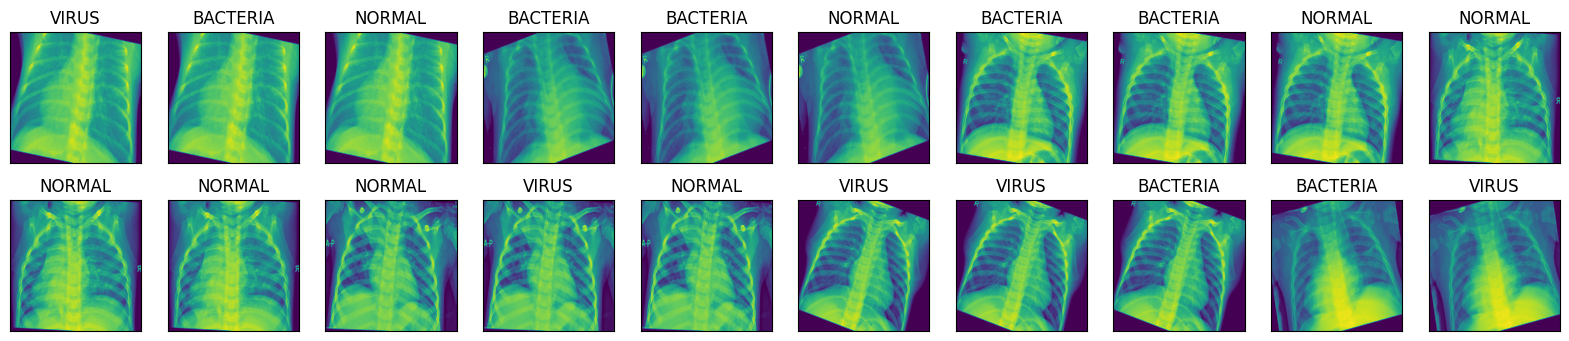

In [ ]:
X_, y_ = next(iter(data.DataLoader(train_dataset, batch_size=20, shuffle=True)))
show_images(X_.reshape(60, 224, 224), 2, 10, titles=get_pneumonia_labels(y_), scale=2);
print(X_.shape, X_.dtype, y_.shape, y_.dtype)

##Developing the Models

In [ ]:
n_total_steps = len(train_loader)
def train(net, train_loader, test_loader,val_loader, num_epochs, lr,
              device=device):
    
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            torch.nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = JonathanLoo.Animator(xlabel='epoch', xlim=[0, num_epochs],
                            legend=['train loss', 'train acc', 'test acc','val acc'])
    timer = JonathanLoo.Timer()
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = JonathanLoo.Accumulator(3)
        for i, (X, y) in enumerate(train_loader):
            timer.start()
            net.train()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], JonathanLoo.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_loss = metric[0]/metric[2]
            train_acc = metric[1]/metric[2]
            if (i + 1) % 50 == 0:
                animator.add(epoch + i / len(train_loader),
                             (train_loss, train_acc, None))
        test_acc = JonathanLoo.evaluate_accuracy_gpu(net, test_loader)
        val_acc = JonathanLoo.evaluate_accuracy_gpu(net, val_loader)
        animator.add(epoch+1, (None, None, test_acc, val_acc))
    if (i+1) % 1 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}],loss {train_loss:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f},Val Loss: {val_acc:.4f}')
      
      print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')



Another dataloader

In [ ]:
# def get_dataloader_workers():
#     return 4  # Use 4 processes to read the data.

# def load_data_pneumonia(batch_size, resize=None):  
    
#     trans = [transforms.ToTensor()]
#     if resize:
#         trans.insert(0, transforms.Resize(resize))
#     trans = transforms.Compose(trans)

#     train_dataset2=dset.ImageFolder(root=train, transform=transform)

#     test_dataset2=dset.ImageFolder(root=test, transform=transform )

#     val_dataset2=dset.ImageFolder(root=val, transform=transform )

#     return (data.DataLoader(train_dataset2, batch_size, shuffle=True,
#                             num_workers=get_dataloader_workers()),
#             data.DataLoader(test_dataset2, batch_size, shuffle=False,
#                             num_workers=get_dataloader_workers()))

In [ ]:
"""train_iter=train_loader
test_iter=test_loader"""

'train_iter=train_loader\ntest_iter=test_loader'

In [ ]:
#train_iter, test_iter = load_data_pneumonia(750, resize=224)
#for X, y in train_iter:
#    print(X.shape, X.dtype, y.shape, y.dtype)
#    break

Epoch [1/1], Step [7/7],loss 1.059, train acc 0.453, test acc 0.388,Val Loss: 0.3333
1151.8 examples/sec on cuda


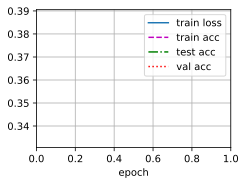

In [ ]:
#LeNet
class Reshape(torch.nn.Module):
    def forward(self, x):
        return x.view(-1,3,224,224)

lenet = torch.nn.Sequential(
    Reshape(),
    nn.Conv2d(3, 10, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(10, 30, kernel_size=5), nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(30 * 54 * 54, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 3))

#lr, num_epochs, batch_size = 0.03, 1, 750

#lr, num_epochs, batch_size = 0.01, 10, 128
#train_iter, test_iter = load_data_pneumonia(batch_size=batch_size)
train(lenet, train_loader, test_loader, val_loader, num_epochs, learning_rate)



## Applying WeightedRandomSampler

In [ ]:
from torch.utils.data import WeightedRandomSampler



hyper_param = {
    "balance":True,
    "num_epochs": 2,
    "batch_size": 750,
    "image_size": 224,
    "fc1_size": 512,
    "lr": 0.03,
    "scheduler": 'CosineAnnealingLR10'
}

def create_weighted_sampler(hyper_param, dataset):
    targets = [label for _, label in dataset]
    class_counts = np.bincount(targets)
    class_weights = 1.0 / class_counts
    weights = [class_weights[label] for label in targets]
    sampler = WeightedRandomSampler(weights, len(weights))
    return sampler

# Replace the train_loader creation with the following code
if (hyper_param["balance"]):
    sampler = create_weighted_sampler(hyper_param, train_dataset)
    train_loader2 = torch.utils.data.DataLoader(train_dataset, batch_size=750, sampler=sampler, num_workers=4)    
else:
    train_loader2 = torch.utils.data.DataLoader(train_dataset, batch_size=750, shuffle=True, num_workers=4)

In [ ]:
#AlexNet
alexnet = nn.Sequential(
    # Here, we use a larger 11 x 11 window to capture objects. At the same
    # time, we use a stride of 4 to greatly reduce the height and width of the
    # output. Here, the number of output channels is much larger than that in
    # LeNet
    nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Make the convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output, and increase the number of
    # output channels
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Use three successive convolutional layers and a smaller convolution
    # window. Except for the final convolutional layer, the number of output
    # channels is further increased. Pooling layers are not used to reduce the
    # height and width of input after the first two convolutional layers
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # Here, the number of outputs of the fully-connected layer is several
    # times larger than that in LeNet. Use the dropout layer to mitigate
    # overfitting
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # Output layer. Since we are using Fashion-MNIST, the number of classes is
    # 10, instead of 1000 as in the paper
    nn.Linear(4096, 10))

#lr, num_epochs, batch_size = 0.01, 10, 128
#train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)
train(alexnet, train_loader, test_loader, val_loader, num_epochs, learning_rate)

In [ ]:
# class ConvNet(nn.Module):
#     def __init__(self):
#         super(ConvNet, self).__init__()
#         self.conv1=nn.Conv2d(3,10,5)
#         self.pool=nn.MaxPool2d(2,2)
#         self.conv2=nn.Conv2d(10,30,5)
#         self.fc1=nn.Linear(30*53*53,120)
#         self.fc2=nn.Linear(120,84)
#         self.fc3=nn.Linear(84,15)

#     def forward(self,x):
#         x=self.pool(F.relu(self.conv1(x)))
#         x=self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 30 * 53 * 53)  
#         x=F.relu(self.fc1(x))
#         x=F.relu(self.fc2(x))
#         x=self.fc3(x)
#         return x

# model=ConvNet().to(device)

# criterion=nn.CrossEntropyLoss()
# optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
"""n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    total_loss = 0
    total_correct = 0
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * batch_size
        
        total_correct += (outputs.argmax(dim=1).eq(labels)).sum().item()
        
        acc = total_correct/len(train_dataset)
        
        if (i+1) % 1 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f} Accuracy: {acc}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)"""